<a href="https://colab.research.google.com/github/somesh636/Google_Colab_Projects/blob/master/TensorFlow_LI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 1.8.0

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.8.0`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


LINKEDIN LEARNING MODULE CHAPTER-1

In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf

msg = tf.string_join(['Hello', 'TensorFlow'])

with tf.Session() as sess: 
  print(sess.run(msg))


b'HelloTensorFlow'


In [4]:
t1 = tf.constant([[1,2,3], [4,5,6], [7,8,9]])
t2 = tf.slice(t1, [1,1], [2,2])
print(t2)
print(tf.get_default_graph())

Tensor("Slice:0", shape=(2, 2), dtype=int32)


In [5]:
''' usage of Tensors, Graphs, Sessions'''

from __future__ import absolute_import 
from __future__ import division
from __future__ import print_function

import tensorflow as tf 

# Create two tensor and perform addition 

t1 = tf.constant([1.2, 2.3, 3.4, 4.5])
t2 = tf.random_normal([4])
t3 = t1+t2 
graph1 = tf.get_default_graph()

# Create second Graph and two tensors 
graph2 = tf.Graph()
with graph2.as_default():
  t4 = tf.constant([5.6, 6.7, 7.8, 8.9])
  t5 = tf.random_normal([4])
  t6 = t4 - t5 

# t4 = tf.constant([5.6, 6.7, 7.8, 8.9])
# t5 = tf.random_normal([4])
# t6 = t4 - t5
# graph2 = tf.get_default_graph()

with tf.Session(graph=graph1) as sess:
  print('Addition ', sess.run(t3)) 

with tf.Session(graph=graph2) as sess: 
  print('Substraction ', sess.run(t6))



Addition  [0.35882372 3.4875631  2.5822103  4.015149  ]
Substraction  [ 5.370562   6.9681244  8.317058  10.597717 ]


In [6]:
''' TensorFlow Variable Initialization ''' 

v1 = tf.Variable(2)
v2 = tf.Variable(3)
v3 = v1 + v2 

init = tf.global_variables_initializer()

with tf.Session() as sess: 
  sess.run(init)
  result = sess.run(v3)
  tf.logging.set_verbosity(tf.logging.INFO)
  tf.logging.info('Result: {0}'.format(result))

INFO:tensorflow:Result: 5


In [7]:
''' Tensorflow Machine Learning and Training With Optimizer '''

from __future__ import absolute_import 
from __future__ import division
from __future__ import print_function 
import tensorflow as tf 

learn_rate = 0.2 
num_steps = 100 

x = tf.Variable(0.0)
loss = tf.pow(x, 2) - 4.0*x + 5.0 
optimizer = tf.train.AdagradOptimizer(learn_rate).minimize(loss)

with tf.Session() as sess: 
  sess.run(tf.global_variables_initializer())
  for _ in range(num_steps):
    _, loss_val, x_val = sess.run([optimizer, loss, x])

  
  tf.logging.set_verbosity(tf.logging.INFO)
  str = 'x is {0} and the loss is {1} '.format(x_val, loss_val)
  tf.logging.info(str)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:x is 1.9449639320373535 and the loss is 1.0032293796539307 


In [1]:
%tensorflow_version 1.8.0

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.8.0`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [2]:
''' LINEAR REGRESSION ''' 

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function 
import numpy as np 
import tensorflow as tf 


N =1000 
learn_rate = 0.1
batch_size = 40 
num_batches = 400 

x = np.random.normal(size=N)
m_real = np.random.normal(loc=0.5, scale=0.2, size=N)
b_real = np.random.normal(loc=1.0, scale=0.2, size=N)

y = m_real*x + b_real 
m = tf.Variable(tf.random_normal([]))
b = tf.Variable(tf.random_normal([]))

gstep = tf.Variable(0, trainable=False)

x_holder = tf.placeholder(tf.float32, shape=[batch_size])
y_holder = tf.placeholder(tf.float32, shape=[batch_size])

model = m * x_holder + b 
loss = tf.reduce_mean(tf.pow(model - y_holder, 2))

optimizer = tf.train.GradientDescentOptimizer(learn_rate).minimize(loss)

op1 = tf.summary.scalar('m', m)
op2 = tf.summary.scalar('b', b)
merged_op = tf.summary.merge_all()

file_writer = tf.sum

with tf.Session() as sess: 
  sess.run(tf.global_variables_initializer())

  for _ in range(num_batches): 
    x_data = np.empty(batch_size)
    y_data = np.empty(batch_size)

    for i in range(batch_size): 
      index = np.random.randint(0,N)
      x_data[i] = x[index]
      y_data[i] = y[index]

    sess.run(optimizer, feed_dict = {x_holder: x_data, y_holder: y_data})
  
  print('m: ', sess.run(m))
  print('b: ', sess.run(b))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


AttributeError: ignored

In [1]:
%tensorflow_version 1.8

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.8`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [2]:
''' Dataset and Iterators Creation '''
from __future__ import absolute_import 
from __future__ import division
from __future__ import print_function

import tensorflow as tf 

def gen_func():
  x = 12
  while x < 20: 
    yield x 
    x += 2

ds1 = tf.data.Dataset.range(4)
iter1 = ds1.make_one_shot_iterator()

t1 = tf.constant([4,5])
t2 = tf.constant([6,7])

ds2 = tf.data.Dataset.from_tensors([t1, t2])
iter2 = ds2.make_one_shot_iterator()

t3 = tf.constant([[8], [9], [10], [11]]) 
ds3 = tf.data.Dataset.from_tensor_slices(t3)
iter3 = ds3.make_one_shot_iterator()

ds4 = tf.data.Dataset.from_generator(gen_func, output_types=tf.int64)
iter4 = ds4.make_one_shot_iterator()

with tf.Session() as sess: 

  for _ in range(4):
    print(sess.run(iter1.get_next()))

  print(sess.run(iter2.get_next()))

  for _ in range(4):
    print(sess.run(iter3.get_next()))

  for _ in range(4):
    print(sess.run(iter4.get_next()))


Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.
0
1
2
3
[[4 5]
 [6 7]]
[8]
[9]
[10]
[11]
12
14
16
18


In [1]:
%tensorflow_version 1.8.0

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.8.0`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [3]:
''' Working with MNIST Datasets ''' 

from __future__ import absolute_import 
from __future__ import division 
from __future__ import print_function
from google.colab import drive 

import tensorflow as tf 
import matplotlib.pyplot as plt

dset_path = 'https://drive.google.com/open?id=1mGMZvhmruGOan4ne9PQD4WezKukyxPA_'

dset = tf.data.TFRecordDataset(dest_path)
iter = dset.make_one_shot_iterator()

feature_dict = {'images': tf.FixedLenFeature([], tf.string),
                'labels': tf.FixedLenFeature([], tf.int64)}

with tf.Session() as sess: 
  example = sess.run(iter.get_next())
  mnist = tf.parse_single_example(example, feature_dict)

  pixels = tf.decode_raw(mnist['images'], tf.uint8)
  pixel_matrix = pixels.eval().reshape((28,28))
  plt.imshow(pixel_matrix, cmap='gray')
  plt.show()



NameError: ignored

In [4]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


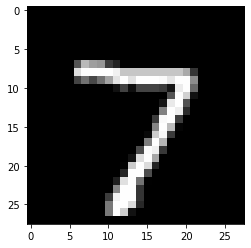

In [7]:
''' Working with MNIST Datasets ''' 

from __future__ import absolute_import 
from __future__ import division 
from __future__ import print_function
from google.colab import drive 

import tensorflow as tf 
import matplotlib.pyplot as plt

#dset_path = '/content/drive/My Drive/mnist_test.tfrecords'

dset = tf.data.TFRecordDataset('/content/drive/My Drive/mnist_test.tfrecords')
iter = dset.make_one_shot_iterator()

feature_dict = {'images': tf.FixedLenFeature([], tf.string),
                'labels': tf.FixedLenFeature([], tf.int64)}

with tf.Session() as sess: 
  example = sess.run(iter.get_next())
  mnist = tf.parse_single_example(example, feature_dict)

  pixels = tf.decode_raw(mnist['images'], tf.uint8)
  pixel_matrix = pixels.eval().reshape((28,28))
  plt.imshow(pixel_matrix, cmap='gray')
  plt.show()

